In [1]:
import os
import numpy as np # import numerical python
import pandas as pd # import pandas
import scipy as sp
import xarray as xr # import xarray
import struct # import for importing binary
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.special import erf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager
from matplotlib import cm
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import sys
sys.path.append("/home/jbeckwith/Documents/Dropbox (Cambridge University)/Chemistry/Lee/Code/Python/CommonFunctions") 
import GaussExp_Distribution
import MVChangePoint
import DHOF_Distribution
import DHOA_Distribution
from PlottingFunctions import Plotter
plots = Plotter(poster=True)
GED = GaussExp_Distribution.gaussexp_dist
MVCP = MVChangePoint.MVCP()

In [14]:
S = 1.25
nu0 = 20
sigma1 = 0.2
omega = 0.4
A = 500
B = 100
nsignal = int(A/2)
CPL = A/2
sigma2 = 0.1
DHO_1 = DHOF_Distribution.DHOF_dist(S, nu0, sigma1, omega)
DHO_2 = DHOF_Distribution.DHOF_dist(S, nu0, sigma2, omega)

data_dho = np.zeros([A, B])
for i in np.arange(B):
    signal_1 = (DHO_1.rvs(size=(nsignal))) # get signal
    signal_2 = (DHO_2.rvs(size=(nsignal))) # get signal
    data_dho[:, i] = np.hstack([signal_1, signal_2])
 
data_wavelength = 1e4/data_dho
bins = np.linspace(480, 600, 51)
data_wavelength_spec = np.zeros([A, len(bins)-1])
for i in np.arange(A):
    data_wavelength_spec[i, :] = np.histogram(data_wavelength[i, :], bins=bins)[0]    


In [92]:
mean = np.mean(data_wavelength_spec, axis=1)
std = np.std(data_wavelength_spec, axis=1)*-(bins[0] - bins[1])

In [85]:
bins[2]

484.8

In [16]:
t = np.arange(2, len(data_wavelength_spec)-2)
Q = MVCP.EmpiricalDivergence(data_wavelength_spec, t)

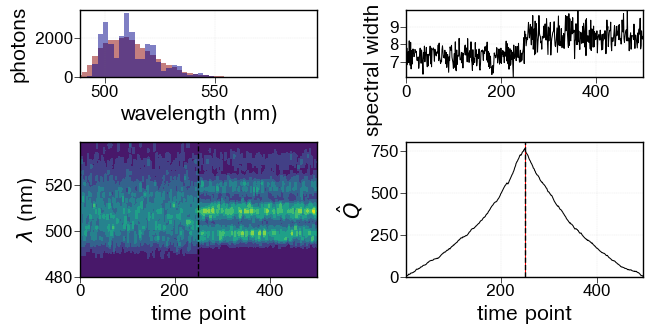

In [112]:
fig, axs = plots.two_column_plot(ncolumns=2, nrows=2, widthratio=[1,1], heightratio=[0.5, 1], height=3.5)

lwg=0.25
data = data_wavelength_spec

x = bins[:-1]
y = np.arange(0, 500)

axs[0,0] = plots.histogram_plot(axs[0,0], data=data_wavelength[:250, :].ravel(), bins=bins, histcolor='darkred', alpha=0.5, density=False, xaxislabel='wavelength (nm)')
axs[0,0] = plots.histogram_plot(axs[0,0], data=data_wavelength[250:, :].ravel(), bins=bins, histcolor='darkblue', alpha=0.5, density=False, xaxislabel='wavelength (nm)')
axs[0,0].set_ylabel('photons', fontsize=15)

axs[0,1] = plots.line_plot(axs[0,1], x=y, y=std, xaxislabel='', yaxislabel=r'spectral width (nm)')


xv, yv = np.meshgrid(y, x, indexing='ij')
z = data_wavelength_spec
axs[1,0].contourf(xv,yv,z)

for c in axs[1,0].collections:
    c.set_edgecolor("face")
axs[1,1] = plots.line_plot(axs[1,1], t, Q, xaxislabel='time point', yaxislabel=r'$\hat{Q}$')

#axs[0].plot(t, Q, color='k', lw=1, label='Q metric')
axs[1,1].vlines(t[np.argmax(Q)], 0, np.nanmax(Q)*2, lw=0.75, color='r')
axs[1,1].vlines(CPL, 0, np.nanmax(Q)*2, lw=1, ls='--', color='k')
#axs[1,1].legend(loc='upper left', frameon=False)
axs[1,1].set_xlim([np.nanmin(t), np.nanmax(t)])
axs[1,1].set_ylim([0, np.nanmax(Q)+(0.05*np.nanmax(Q))])

#axs[1].plot(np.arange(0, len(data)), np.mean(data, axis=1), color='k', lw=1)
axs[1,0].vlines(CPL, 0, np.nanmax(Q)*2, lw=1, ls='--', color='k', label='true CP location')

axs[1,0].set_xlabel('time point', fontsize=15)
axs[1,0].set_ylabel('$\lambda$ (nm)', fontsize=15)
axs[1,0].set_xlim([0, len(data)])
axs[1,0].set_ylim([np.min(yv), np.max(np.mean(yv, axis=1))])
axs[1,1].grid(True,which="both",ls="--",c='gray', lw=lwg, alpha=0.25)
plt.tight_layout()
plt.savefig('20231124_ChangePoint_Spectrum.svg', transparent=True, dpi=600)

In [2]:
files = os.listdir('Spectrum_forPlot')

In [3]:
files_csv = np.sort([e for e in files if '.csv' in e])

In [30]:
files_csv

array(['20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p05kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p06kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p07kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p08kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p09kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p12kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p14kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p16kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p19kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p1kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p22kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p25kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p29kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p33kK.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p39kK.csv',
       '202

In [4]:
files_GCP = os.listdir('Spectrum_forPlot/Gauss_CPResults')
files_GCPcsv = np.sort([e for e in files_GCP if '.csv' in e])

In [5]:
files_GCPcsv

array(['20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p043kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p046kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p049kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p04kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p052kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p056kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p059kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p05kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p063kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p068kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p06kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p072kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p077kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p07kk.csv',
       '20231204_SpectralTesting_Sigma1_0p2kK_Sigma2_0p082kk.csv',

In [5]:
test = pd.read_csv(os.path.join('Lifetime_forPlot', files_csv[0])).CP_location.values

In [6]:
array_NPCP = np.zeros([len(files_csv), 2])
for i in np.arange(len(files_csv)):
    test = pd.read_csv(os.path.join('Spectrum_forPlot', files_csv[i])).CP_location.values
    array_NPCP[i, 0] = float(files_csv[i].split('Sigma2_')[-1].split('.csv')[0].replace('p', '.').split('kK')[0])
    array_NPCP[i, 1] = sum(np.isclose(test, 250, atol=3, rtol=0))/100.
array_NPCP = array_NPCP[np.argsort(array_NPCP[:, 0], axis=0)]

In [7]:
array_GCP = np.zeros([len(files_GCPcsv), 2])
for i in np.arange(len(files_GCPcsv)):
    test = pd.read_csv(os.path.join('Spectrum_forPlot/Gauss_CPResults', files_GCPcsv[i]), header=None).values[:, 1]
    array_GCP[i, 0] = float(files_GCPcsv[i].split('Sigma2_')[-1].split('.csv')[0].replace('p', '.').split('kk')[0])
    array_GCP[i, 1] = sum(np.isclose(test, 250, atol=3, rtol=0))/100.
array_GCP = array_GCP[np.argsort(array_GCP[:, 0], axis=0)]

In [8]:
files_GCP2 = os.listdir('Spectrum_forPlot/Gauss_CPResultsMean')
files_GCP2csv = np.sort([e for e in files_GCP2 if '.csv' in e])
array_GCP2 = np.zeros([len(files_GCP2csv), 2])
for i in np.arange(len(files_GCP2csv)):
    test = pd.read_csv(os.path.join('Spectrum_forPlot/Gauss_CPResultsMean', files_GCP2csv[i]), header=None).values[:, 1]
    array_GCP2[i, 0] = float(files_GCP2csv[i].split('Sigma2_')[-1].split('.csv')[0].replace('p', '.').split('kk')[0])
    array_GCP2[i, 1] = sum(np.isclose(test, 250, atol=3, rtol=0))/100.
array_GCP2 = array_GCP2[np.argsort(array_GCP2[:, 0], axis=0)]

In [57]:
array_GCP

array([[0.04, 0.  ],
       [0.05, 0.  ],
       [0.06, 0.  ],
       [0.07, 0.  ],
       [0.08, 0.  ],
       [0.09, 0.  ],
       [0.1 , 0.  ],
       [0.12, 0.  ],
       [0.14, 0.  ],
       [0.16, 0.  ],
       [0.19, 0.  ],
       [0.22, 0.  ],
       [0.25, 0.  ],
       [0.29, 0.1 ],
       [0.33, 0.34],
       [0.39, 0.69],
       [0.45, 0.91],
       [0.52, 0.99],
       [0.6 , 1.  ],
       [0.69, 1.  ],
       [0.8 , 1.  ]])

In [8]:
array_NPCP_dist = np.zeros([20, 2])
for i in np.arange(20):
    test = pd.read_csv(os.path.join('Lifetime_forPlot', files_csv[i])).CP_location.values
    array_NPCP_dist[i, 0] = float(files_csv[i].split('Tau2_')[-1].split('.csv')[0].replace('p', '.').split('ns')[0])
    array_NPCP_dist[i, 1] = 100*(np.mean(np.abs(250 - test))/250.)
array_NPCP_dist = array_NPCP_dist[np.argsort(array_NPCP_dist[:, 0], axis=0)]

In [7]:
tau1 = 10.
array_NPCP[:, 0] = np.logspace(np.log10(tau1/10.), np.log10(tau1*10), 20)

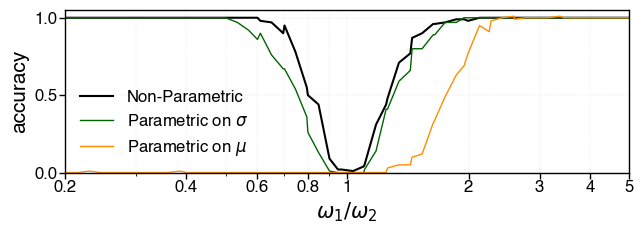

In [21]:
fig, axs = plots.two_column_plot(height=2.5)

axs = plots.line_plot(axs, array_NPCP[:, 0]/0.2, array_NPCP[:, 1], yaxislabel='accuracy', lw=1.5, xaxislabel=r'$\omega_{1}/\omega_{2}$', label='Non-Parametric')
axs = plots.line_plot(axs, array_GCP[:, 0]/0.2, array_GCP[:, 1], yaxislabel='accuracy', lw=1, color='darkgreen', xaxislabel=r'$\omega_{1}/\omega_{2}$', label=r'Parametric on $\sigma$')
axs = plots.line_plot(axs, array_GCP2[:, 0]/0.2, array_GCP2[:, 1], yaxislabel='accuracy', lw=1, color='darkorange', xaxislabel=r'$\omega_{1}/\omega_{2}$', label=r'Parametric on $\mu$')

axs.set_xscale('log')
axs.set_xticks([0.2, 0.4, 0.6, 0.8, 1, 2, 3, 4, 5])
axs.set_xticklabels(['0.2', '0.4', '0.6', '0.8', '1', '2', '3', '4', '5'])
axs.set_ylim([0, 1.05])
axs.set_xlim([0.2, 5])
axs.legend(loc='best', frameon=False)
#plt.plot(array_GCP[:, 0]/10, array_GCP[:, 1])
plt.tight_layout()
plt.savefig('20231205_ChangePoint_Lifetime_Accuracy.svg', transparent=True, dpi=600)

In [50]:
S = 1.25
nu0 = 20
sigma1 = 0.2
omega = 0.4
ntests = 1
A = 500
B = 100
nsignal = int(A/2)
CPL = A/2

sigma2 = 0.15
DHO_1 = DHOF_Distribution.DHOF_dist(S, nu0, sigma1, omega)
DHO_2 = DHOF_Distribution.DHOF_dist(S, nu0, sigma2, omega)

data_dho = np.zeros([A, B, ntests])
for i in np.arange(B):
    signal_1 = (DHO_1.rvs(size=(nsignal, ntests))) # get signal
    signal_2 = (DHO_2.rvs(size=(nsignal, ntests))) # get signal
    data_dho[:, i, :] = np.vstack([signal_1, signal_2])
 
data_wavelength = 1e4/data_dho
bins = np.linspace(480, 600, 51)
data_wavelength_spec = np.zeros([A, len(bins)-1, ntests])
for test in np.arange(ntests):
    for i in np.arange(A):
        data_wavelength_spec[i, :, test] = np.histogram(data_wavelength[i, :, test], bins=bins)[0]    


In [51]:
result = changeforest(data_wavelength_spec[:, :, 0], "random_forest", "bs")
result

                best_split max_gain p_value
(0, 500]               249  100.421   0.005
 ¦--(0, 249]           241  -26.814   0.855
 °--(249, 500]         264   -1.082    0.64

/tmp/ipykernel_257707/1617723772.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  result.plot().show()


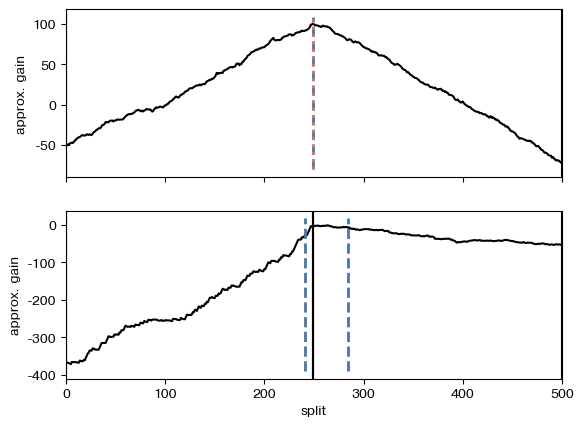

In [52]:
result.plot().show()

In [65]:
result

                best_split max_gain p_value
(0, 500]               249  101.326   0.005
 ¦--(0, 249]           243  -31.426   0.995
 °--(249, 500]         254  -34.727   0.895